# Advanced Dataming Project 3

# AirBnB listings in major US cities

Zirong Wu, Ram Das, Bindu Vasireddy

# Problem framing and Goal

## Introduction 
This data is from Deloitte Machine Learning Competition.

The aim of this competition was to predict the price of AirBnB listings in major U.S. cities.

In project 3, we would like to apply the text mining in ** 'description' and 'name' ** columns in order to ** predict the price of Airbnb listings in New York City **.

** nltk, sklearn, XGBoost, Keras ** will be applied in this project mainly.

Pleace click [Link](https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml) to assess the data source on Kaggle.

Reference kernel [How I ranked 5th/+160 in Deloitte's ML Competition](https://www.kaggle.com/rudymizrahi/how-i-ranked-5th-160-in-deloitte-s-ml-competition).

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Get the data

In [2]:
# id, description, name
df = pd.read_csv('Textminingpart.csv')

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32349 entries, 0 to 32348
Data columns (total 3 columns):
id             32349 non-null int64
description    32349 non-null object
name           32349 non-null object
dtypes: int64(1), object(2)
memory usage: 758.3+ KB


## Text data assemble

In [3]:
# str the cell in each series (lambda)
df.description = df.description.apply(lambda row: str(row))

In [4]:
df.name = df.name.apply(lambda row: str(row))

In [5]:
df.description.head()

0    Beautiful, sunlit brownstone 1-bedroom in the ...
1    Enjoy travelling during your stay in Manhattan...
2    The Oasis comes complete with a full backyard ...
3    This is a bright bedroom in an historic buildi...
4    I am renting a very spacious, unique, bright L...
Name: description, dtype: object

## Text data preprocessing

In [22]:
# remove stop words stemmer, wordnetlemmatizer
from nltk.corpus import stopwords as StopwordFactory
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer

class Descriprepper():
    # Class for preprepare the text data
    def __init__(self):
        self.poster = PorterStemmer()
        regex_caps = '[A-Z]\w+'
        self.tokenizer_caps = RegexpTokenizer(regex_caps)
        self.tokenizer_words = TweetTokenizer()
        self.stopwords = StopwordFactory.words('english')
        self.stopwords += ["i've", "...", "i'm", ".", "'", "it's", "/", ")", "(", "]",
                           "[", ",", "!", "?", '"', '-', ':', '*', 'deleted', "|", "^", "#"
                          ">", "<", 'I', 'A', 'one', '&', 'two', 'away', 'th', 'L', 'C', '’', "★", "•",
                          '=', "。"]
        
    # function to remove numbers
    def remove_numbers(self, raw):
        return re.sub(r'\d+', '', raw)

    # function to remove whitespace
    def remove_whitespace(self, raw):
        return ' '.join(raw.split())
    # function to tokenize    
    def _tokenize(self, raw):
        caps = self.tokenizer_caps.tokenize(raw)
        allwords = self.tokenizer_words.tokenize(raw)
        lowers = [w for w in allwords if w not in caps]
        return caps, lowers
    # function to remove stop words
    def _rmstopwords(self, caps, lowers):
        lowerstop = [w for w in lowers if w not in self.stopwords]
        capstop = [w for w in caps if w.lower() not in self.stopwords]
        return lowerstop, capstop
    # ensemble function
    def prep(self, raw):
        #raw = remove_numbers(raw)
        #raw = remove_whitespace(raw)
        caps, lowers = self._tokenize(raw)
        lowerstop, capstop = self._rmstopwords(caps, lowers)
        lowerstemmed = [self.poster.stem(w) for w in lowerstop]
        return capstop + lowerstemmed
        

'''
# function to remove stop words
def remove_stopwords(text, lang = 'english'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang)
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return ' '.join(stopwords_removed)

# function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# function to remove whitespace
def remove_whitespace(text):
    return ' '.join(text.split())

# function to apply stemming to a list of words
def words_stemmer(words, type = 'PorterStemmer', lang = 'english', encoding = 'utf8'):
    stem_words = []
    stemmer = PorterStemmer()
    for word in words:
        stem_words.append(stemmer.stem(word).encode(encoding))
    return ''.join(stem_words)

# function to apply lemmatization to a list of words
def words_lemmatizer(text, encoding = 'utf8'):
    words = nltk.word_tokenize(text)
    lemma_words = []
    wl = WordNetLemmatizer()
    for word in words:
        pos = find_pos(word)
        lemma_words.append(wl.lemmatize(word, pos).encode(encoding))
    return ' '.join(lemma_words)
    
'''

"\n# function to remove stop words\ndef remove_stopwords(text, lang = 'english'):\n    words = nltk.word_tokenize(text)\n    lang_stopwords = stopwords.words(lang)\n    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]\n    return ' '.join(stopwords_removed)\n\n# function to remove numbers\ndef remove_numbers(text):\n    return re.sub(r'\\d+', '', text)\n\n# function to remove whitespace\ndef remove_whitespace(text):\n    return ' '.join(text.split())\n\n# function to apply stemming to a list of words\ndef words_stemmer(words, type = 'PorterStemmer', lang = 'english', encoding = 'utf8'):\n    stem_words = []\n    stemmer = PorterStemmer()\n    for word in words:\n        stem_words.append(stemmer.stem(word).encode(encoding))\n    return ''.join(stem_words)\n\n# function to apply lemmatization to a list of words\ndef words_lemmatizer(text, encoding = 'utf8'):\n    words = nltk.word_tokenize(text)\n    lemma_words = []\n    wl = WordNetLemmatizer()\n    for word i

In [23]:
# create instance
prep = Descriprepper()

### Description Text mining

In [24]:
%time df['descriptoken'] = df.description.apply(lambda row: prep.prep(row))

CPU times: user 2min 16s, sys: 1.35 s, total: 2min 17s
Wall time: 2min 23s


In [63]:
df.head()

,id,description,name,descriptoken,name_sentiment
0,6901257,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,"[Beautiful, Brooklyn, Blocks, Brooklyn, Bridge...",0.5994
1,6304928,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,"[Enjoy, Manhattan, Times, Square, Central, Par...",0.6249
2,7919400,The Oasis comes complete with a full backyard ...,The Garden Oasis,"[Oasis, Best, Best, Garden, Harlem, Historic, ...",0.0000
3,5578513,This is a bright bedroom in an historic buildi...,Large East Village Bedroom To Let!,"[Manhattan, New, York, East, Village, SoHo, Li...",0.0000
4,17589436,"I am renting a very spacious, unique, bright L...","Amazing LES apt - cool, bright...","[NYC, Apt, Lower, East, Side, LES, SOHO, Nolit...",0.7269


In [25]:
# frequency distribution
from nltk import FreqDist

In [26]:
listofdescirp = [w for words in df.descriptoken for w in words]

%time fdist = FreqDist(listofdescirp)

CPU times: user 3.11 s, sys: 36.8 ms, total: 3.15 s
Wall time: 3.29 s


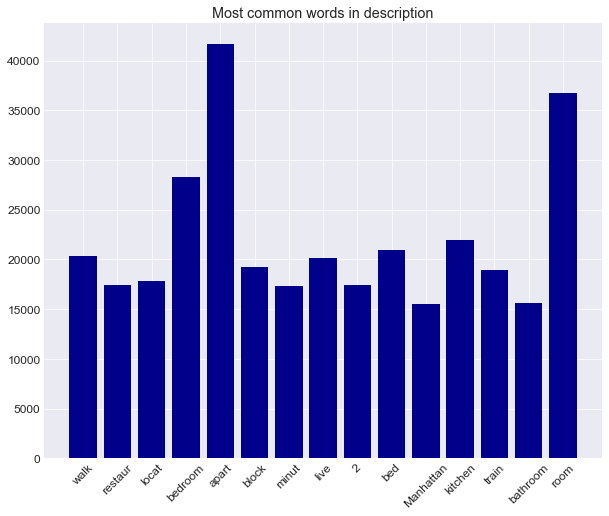

In [27]:
mostcommon = dict(fdist.most_common(15))

# plot for the most common words
plt.figure(figsize = (10, 8))
plt.bar(range(len(mostcommon)), mostcommon.values(), align = 'center', color = 'darkblue')
plt.xticks(range(len(mostcommon)), list(mostcommon.keys()), rotation = 45)
plt.title('Most common words in description');

In general, the host mentions the 'apartment', 'room', 'bedroom', and 'kitchen'. They indicate most of the airbnb in NYC are apartments rather than others.

In [28]:
# N-grams
from nltk import collocations

In [29]:
coll = collocations.BigramCollocationFinder.from_words(listofdescirp)

ngramcoll = dict(coll.ngram_fd.most_common(15))
ngramcoll

{('2', 'bedroom'): 2668,
 ('Central', 'Park'): 4811,
 ('New', 'York'): 6206,
 ('Times', 'Square'): 2991,
 ('apart', 'locat'): 2798,
 ('bar', 'restaur'): 2841,
 ('bedroom', 'apart'): 4880,
 ('live', 'room'): 11821,
 ('min', 'walk'): 3483,
 ('minut', 'walk'): 6659,
 ('queen', 'size'): 3694,
 ('restaur', 'bar'): 3862,
 ('size', 'bed'): 6593,
 ('subway', 'line'): 2796,
 ('walk', 'distanc'): 4223}

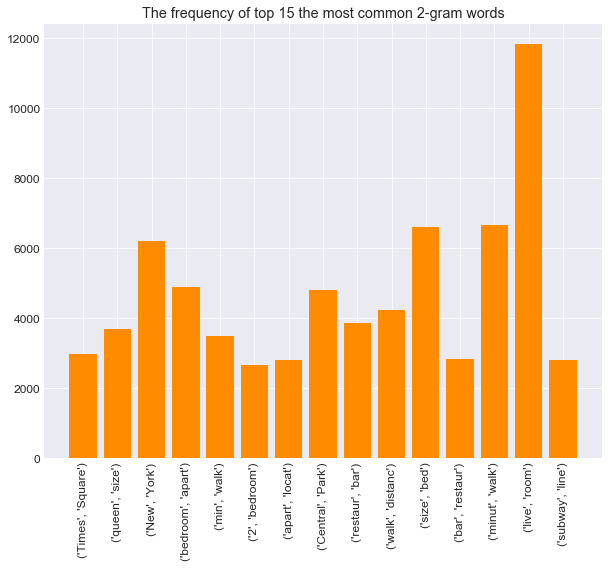

In [30]:
# plot the frequency of ngram
plt.figure(figsize = (10, 8))
plt.bar(range(len(ngramcoll)), ngramcoll.values(), color = 'darkorange')
plt.xticks(range(len(ngramcoll)), ngramcoll.keys(), rotation = 90)
plt.title('The frequency of top 15 the most common 2-gram words');

The combination of 'live' and 'room' is the most frequent to be mentioned, secondly the 'minut' and 'walk' combination, it indicates the location of the airbnb house/apartment was relatively important in hosts' mind.

In [31]:
# TF-IDF
from gensim import corpora, models

In [32]:
# create dictionary for creating the id as integers
dictionary = corpora.Dictionary(df.descriptoken)

print(dictionary)

Dictionary(45147 unique tokens: ['youngest', 'perceiv', 'miunt', 'relax-o', 'Intex']...)


In [33]:
# doc2bow is to simply counts the number of occurences and converts the word to id integer and returns the result as a sparse vector
%time corpus = [dictionary.doc2bow(w) for w in df.descriptoken]

# covert the bag-of-words integer counts to tf-idf weights
tfidf = models.TfidfModel(corpus)

weighted_corpus = tfidf[corpus]

CPU times: user 4.01 s, sys: 106 ms, total: 4.12 s
Wall time: 4.2 s


In [34]:
import gensim
# transform to dense matrix
tfidf_matrix = gensim.matutils.corpus2dense(weighted_corpus, len(dictionary))
tfidf_matrix

array([[0.08948079, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05476665],
       [0.18666492, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3056948 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2895402 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2895402 ,
        0.        ]], dtype=float32)

In [35]:
tfidf_matrix.shape

(45147, 32349)

In [36]:
# lda model
%time ldamodel = models.ldamodel.LdaModel(weighted_corpus, num_topics = 10, id2word = dictionary, passes = 20)

CPU times: user 8min 7s, sys: 6.97 s, total: 8min 14s
Wall time: 8min 35s


In [37]:
# print the top 10 topics
ldamodel.print_topics(num_topics = 10, num_words = 5)

[(0,
  '0.003*"union" + 0.003*"Rockaway" + 0.003*"Bowl" + 0.003*"24h" + 0.003*"Bloomingdales"'),
 (1,
  '0.004*"place" + 0.004*"room" + 0.003*"minut" + 0.003*"apart" + 0.003*"bedroom"'),
 (2,
  '0.004*"World" + 0.004*"Trade" + 0.003*"Wyndham" + 0.003*"Complete" + 0.002*"TriBeCa"'),
 (3,
  '0.003*"United" + 0.003*"Jan" + 0.002*"Staten" + 0.002*"Nations" + 0.002*"Sleeps"'),
 (4,
  '0.003*"ROOM" + 0.002*"BED" + 0.002*"KITCHEN" + 0.002*"BATHROOM" + 0.002*"medic"'),
 (5,
  '0.003*"、" + 0.002*"U" + 0.002*"Company" + 0.002*"Conditioning" + 0.002*"AMC"'),
 (6,
  '0.003*"sublet" + 0.003*"touch" + 0.002*"airbnb" + 0.002*"Flushing" + 0.002*"mid"'),
 (7,
  '0.005*"Madison" + 0.004*"Greenwich" + 0.004*"Circle" + 0.004*"SoHo" + 0.003*"Highline"'),
 (8,
  '0.002*"FULL" + 0.002*"Awesome" + 0.002*"legal" + 0.002*"SPACE" + 0.002*"Simple"'),
 (9,
  '0.003*"Nassau" + 0.003*"medit" + 0.003*"king-siz" + 0.002*"Dresser" + 0.002*"Ten"')]

In [38]:
import pyLDAvis, pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [39]:
ldam = pyLDAvis.gensim.prepare(ldamodel, weighted_corpus, dictionary)
pyLDAvis.display(ldam)

/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


### Name Text mining

In [40]:
# prepare the text
df['name_token'] = df.name.apply(lambda row: prep.prep(row))

In [41]:
# frequence dict
listname = [w for word in df.name_token for w in word]

fdict_name = FreqDist(listname)

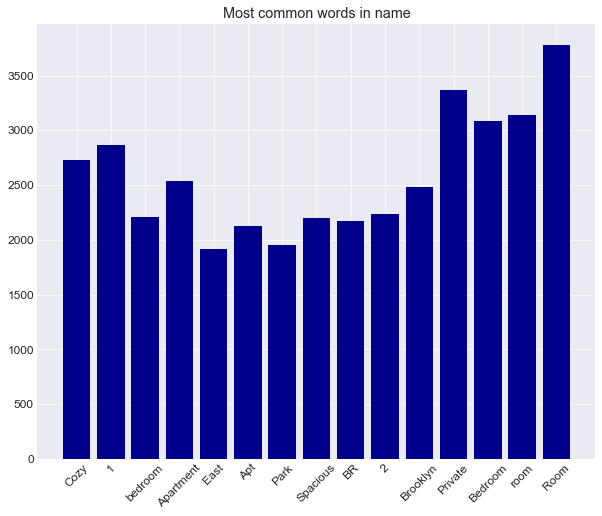

In [42]:
mostcommoname = dict(fdict_name.most_common(15))

# plot for the most common words
plt.figure(figsize = (10, 8))
plt.bar(range(len(mostcommoname)), mostcommoname.values(), align = 'center', color = 'darkblue')
plt.xticks(range(len(mostcommoname)), list(mostcommoname.keys()), rotation = 45)
plt.title('Most common words in name');

Mostly, the names are emphasized room, private, and bedroom. 

In [43]:
# Trigram name
coll_name = collocations.TrigramCollocationFinder.from_words(listname)

trigram = dict(coll_name.ngram_fd.most_common(15))

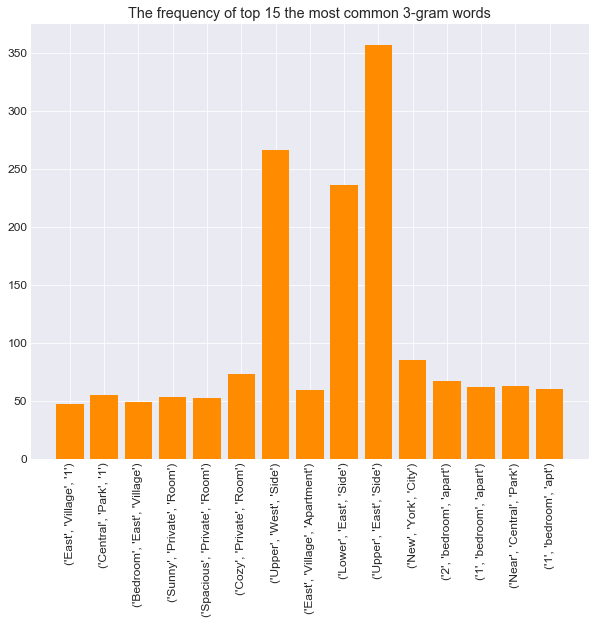

In [44]:
# plot the frequency of ngram
plt.figure(figsize = (10, 8))
plt.bar(range(len(trigram)), trigram.values(), color = 'darkorange')
plt.xticks(range(len(trigram)), trigram.keys(), rotation = 90)
plt.title('The frequency of top 15 the most common 3-gram words');

The location was pointed out in names.

### Sentiment analysis

In [45]:
# sentiment of names
from nltk.sentiment import vader
# initial the instance
sia = vader.SentimentIntensityAnalyzer()
# str each value in name and description
df.name = df.name.apply(lambda row: str(row))
df.description = df.description.apply(lambda row: str(row))

In [46]:
# get the word list
name_list = [n for n in df.name]
desc_list = [d for d in df.description]
# get the polarity scores
name_pscore = [sia.polarity_scores(name) for name in name_list]
desc_pscore = [sia.polarity_scores(desc) for desc in desc_list]

# assign the polarity scores of name and description
df['name_compound'] = [score['compound'] for score in name_pscore]
df['name_neg'] = [score['neg'] for score in name_pscore]
df['name_pos'] = [score['pos'] for score in name_pscore]
df['name_neu'] = [score['neu'] for score in name_pscore]
df['descrip_compound'] = [score['compound'] for score in desc_pscore]
df['descrip_neg'] = [score['neg'] for score in desc_pscore]
df['descrip_pos'] = [score['pos'] for score in desc_pscore]
df['descrip_neu'] = [score['neu'] for score in desc_pscore]

In [47]:
df.head()

,id,description,name,descriptoken,name_token,name_compound,name_neg,name_pos,name_neu,descrip_compound,descrip_neg,descrip_pos,descrip_neu
0,6901257,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,"[Beautiful, Brooklyn, Blocks, Brooklyn, Bridge...","[Beautiful, brownston, 1, bedroom]",0.5994,0.0,0.661,0.339,0.8658,0.048,0.268,0.684
1,6304928,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,"[Enjoy, Manhattan, Times, Square, Central, Par...","[Superb, BR, Apt, Located, Near, Times, Square...",0.6249,0.0,0.406,0.594,0.9755,0.013,0.164,0.823
2,7919400,The Oasis comes complete with a full backyard ...,The Garden Oasis,"[Oasis, Best, Best, Garden, Harlem, Historic, ...","[Garden, Oasis]",0.0000,0.0,0.000,1.000,0.9420,0.060,0.120,0.819
3,5578513,This is a bright bedroom in an historic buildi...,Large East Village Bedroom To Let!,"[Manhattan, New, York, East, Village, SoHo, Li...","[Large, East, Village, Bedroom, Let]",0.0000,0.0,0.000,1.000,0.9595,0.021,0.122,0.858
4,17589436,"I am renting a very spacious, unique, bright L...","Amazing LES apt - cool, bright...","[NYC, Apt, Lower, East, Side, LES, SOHO, Nolit...","[Amazing, LES, apt, cool, bright]",0.7269,0.0,0.670,0.330,0.9935,0.038,0.275,0.687


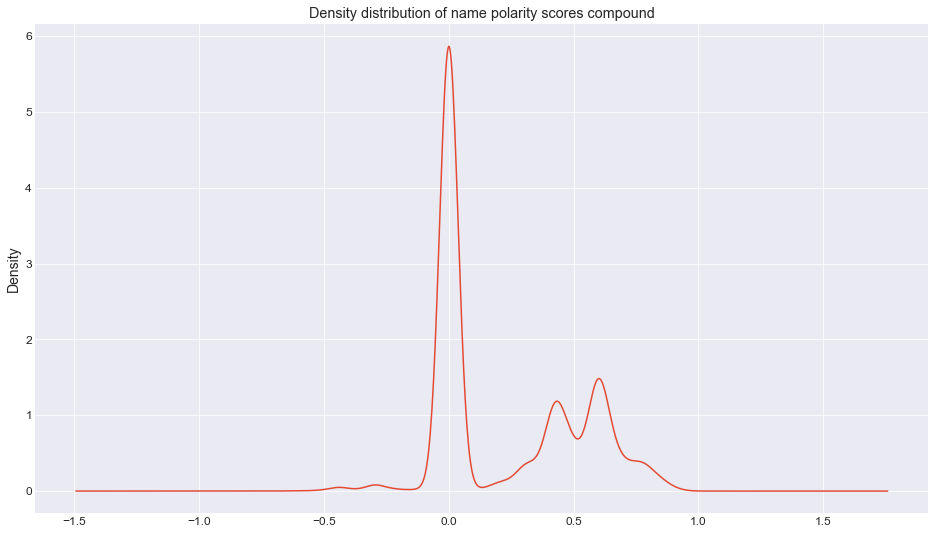

In [48]:
# plot the density distribution
plt.figure(figsize = (16, 9))
df['name_compound'].plot(kind = 'kde')
plt.title('Density distribution of name polarity scores compound');

The name compound density is mostly normal but totally three turosis show in the plot.

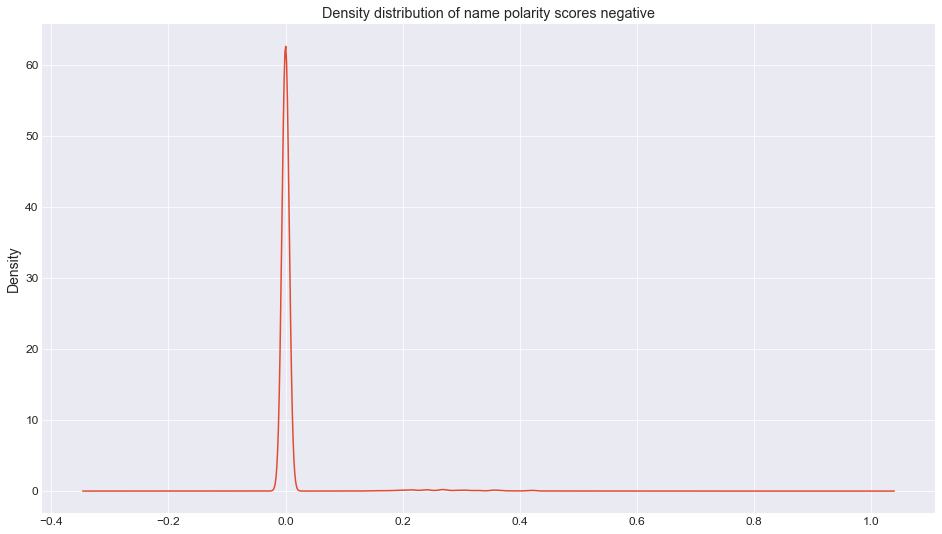

In [49]:
plt.figure(figsize = (16, 9))
df['name_neg'].plot(kind = 'kde')
plt.title('Density distribution of name polarity scores negative');

The name polarity score in negative shows normal distribution shape in mean equal to 0.

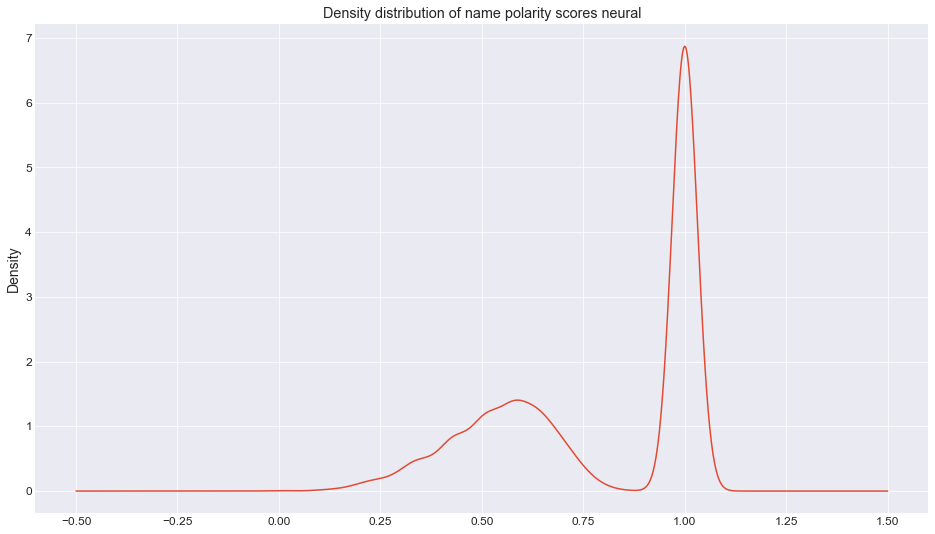

In [50]:
plt.figure(figsize = (16, 9))
df['name_neu'].plot(kind = 'kde')
plt.title('Density distribution of name polarity scores neural');

Most of the polarity scores in neural part is around 1, but some of them are around 0.25 to 0.75.

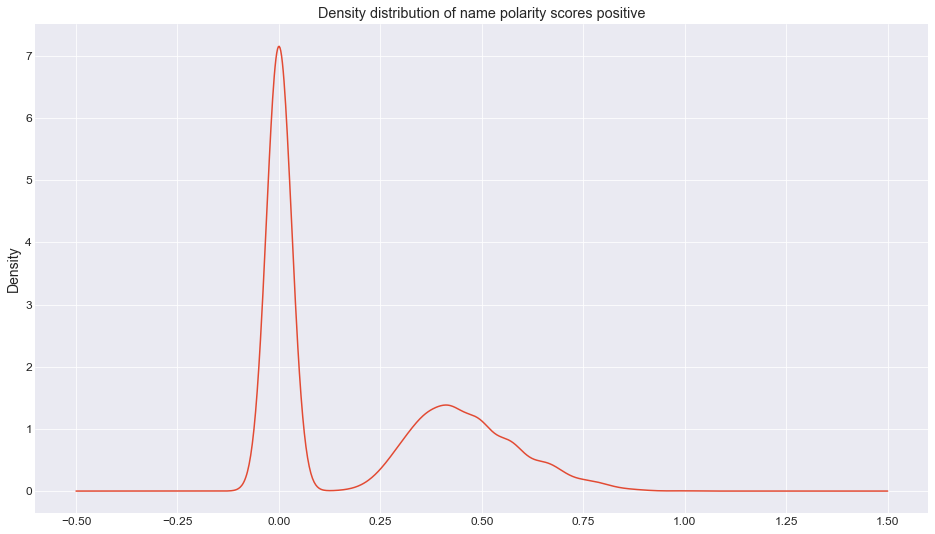

In [51]:
plt.figure(figsize = (16, 9))
df['name_pos'].plot(kind = 'kde')
plt.title('Density distribution of name polarity scores positive');

The density distribution of positive score and neural score are mirror symmetry by vertical line 0.5.

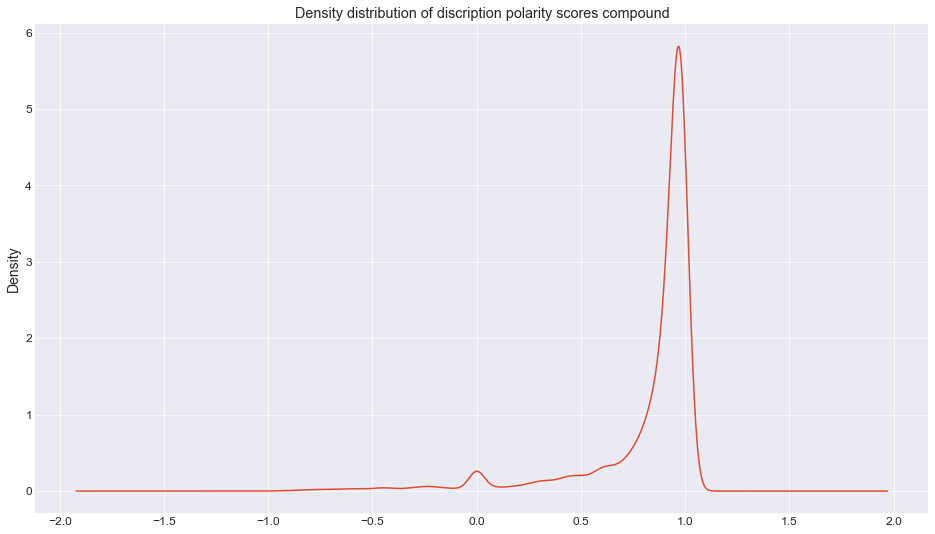

In [52]:
plt.figure(figsize = (16, 9))
df.descrip_compound.plot(kind = 'kde')
plt.title('Density distribution of discription polarity scores compound');

The description compound polarity score shows left skewed.

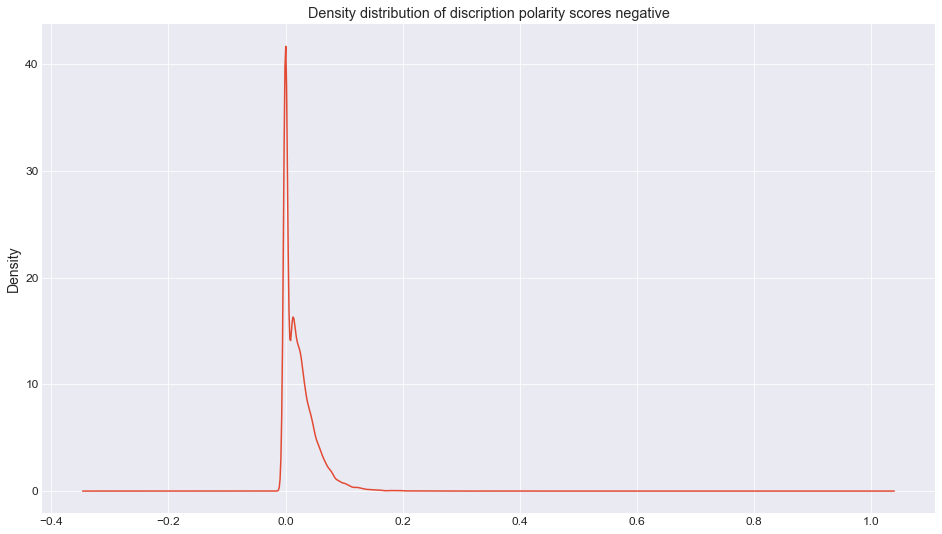

In [53]:
plt.figure(figsize = (16, 9))
df.descrip_neg.plot(kind = 'kde')
plt.title('Density distribution of discription polarity scores negative');

The description polarity scores in negative shows right skewed.

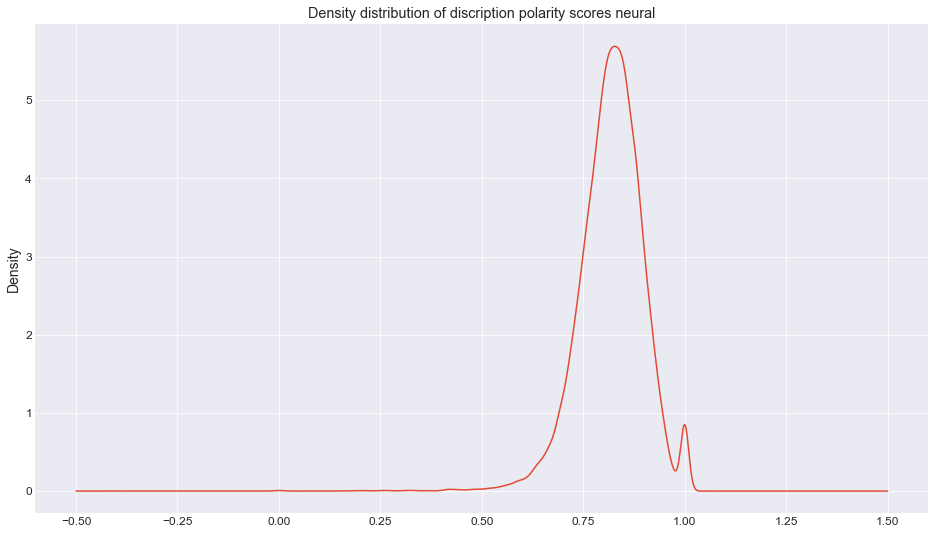

In [54]:
plt.figure(figsize = (16, 9))
df.descrip_neu.plot(kind = 'kde')
plt.title('Density distribution of discription polarity scores neural');

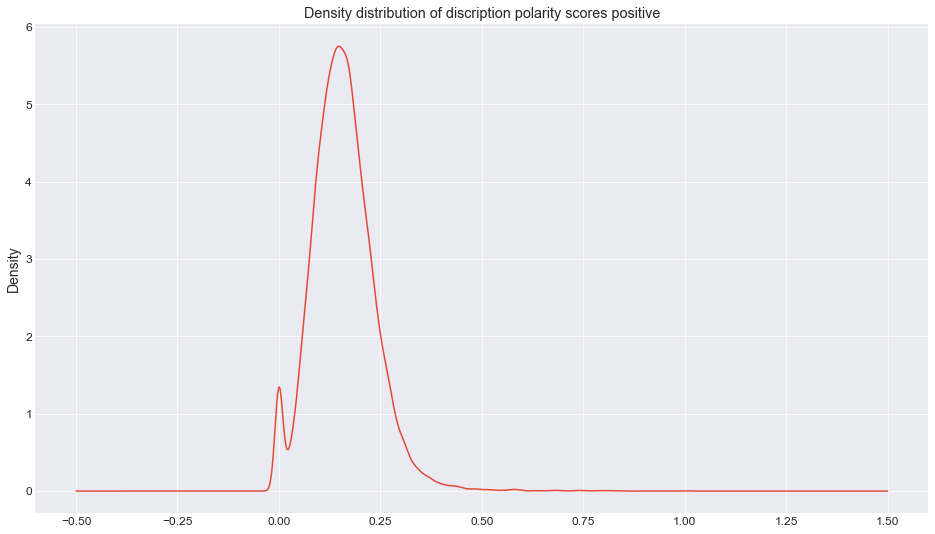

In [55]:
plt.figure(figsize = (16, 9))
df.descrip_pos.plot(kind = 'kde')
plt.title('Density distribution of discription polarity scores positive');

The positive score and neural score are also showed mirror symmetry by 0.5.

In [56]:
# statistical summary
df.describe()

,id,name_compound,name_neg,name_pos,name_neu,descrip_compound,descrip_neg,descrip_pos,descrip_neu
count,3.234900e+04,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000
mean,1.127767e+07,0.231260,0.008018,0.206846,0.784920,0.823977,0.022543,0.158391,0.818938
std,6.073228e+06,0.292692,0.049372,0.247312,0.249048,0.300659,0.027886,0.078198,0.079468
min,2.404000e+03,-0.680800,0.000000,0.000000,0.000000,-0.948500,0.000000,0.000000,0.000000
25%,6.273745e+06,0.000000,0.000000,0.000000,0.568000,0.836000,0.000000,0.108000,0.775000
50%,1.228254e+07,0.000000,0.000000,0.000000,1.000000,0.947400,0.015000,0.154000,0.823000
75%,1.640591e+07,0.510600,0.000000,0.429000,1.000000,0.979300,0.034000,0.202000,0.869000
max,2.122836e+07,0.945100,0.693000,1.000000,1.000000,0.998400,0.693000,1.000000,1.000000


## Data Visulization

In [183]:
# World Cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
# generate a word cloud image
def wordcl(textseries, title):
    # function of generating the wordcloud
    wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=200,
            max_font_size=40,
            scale=8,
            random_state=8
            )
    wordcloudseries = wordcloud.generate(''.join(textseries))
    # Display the generated image
    plt.figure(figsize = (10, 8))
    plt.imshow(wordcloudname.recolor(random_state = 8))
    plt.title(title)
    plt.axis('off');

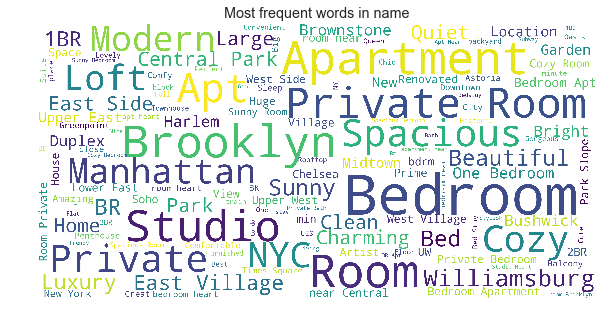

In [185]:
wordcl(df.name, title = 'Most frequent words in name')

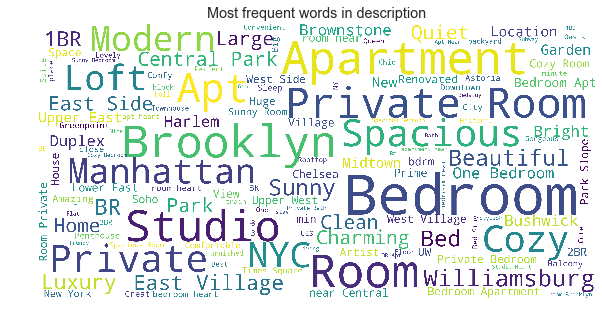

In [187]:
wordcl(df.description, title = 'Most frequent words in description')

Two wordcloud images are almost the same, they reflect that the high frequent words in name and description are similar.

In [57]:
# merge the original table with df
df1 = pd.read_csv('project3model.csv')

df1.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,6901257,5.010635,3,1.0,True,1,1,NaN,0,2,...,False,False,False,False,False,False,False,True,False,True
1,6304928,5.129899,7,1.0,True,1,0,100.0,1,6,...,False,False,False,False,False,False,False,True,False,True
2,7919400,4.976734,5,1.0,True,1,1,100.0,1,10,...,False,False,False,False,False,False,False,True,False,True
3,5578513,4.605170,2,1.0,True,1,1,100.0,0,82,...,False,False,False,False,False,False,False,True,False,True
4,17589436,4.882802,2,1.0,True,1,1,71.0,0,26,...,True,False,False,False,False,False,False,True,False,False


In [58]:
df1.describe()

,id,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,disttocitycenter
count,3.234900e+04,32349.000000,32349.000000,32250.000000,32349.000000,32349.000000,22389.000000,32349.000000,32349.000000,25028.000000,...,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000
mean,1.127767e+07,4.719340,2.818201,1.130775,0.991561,0.633930,93.522310,0.244953,18.121209,93.506553,...,0.002813,0.011314,0.009057,0.971096,0.309530,0.242697,0.447464,0.000278,0.000031,6.315443
std,6.073228e+06,0.661567,1.850809,0.399491,0.091478,0.481736,17.443694,0.430066,32.852804,8.200527,...,0.052965,0.105766,0.094740,0.167538,0.462307,0.428720,0.497240,0.016678,0.005560,3.362445
min,2.404000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444629
25%,6.273745e+06,4.248495,2.000000,1.000000,1.000000,0.000000,100.000000,0.000000,1.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.183853
50%,1.228254e+07,4.653960,2.000000,1.000000,1.000000,1.000000,100.000000,0.000000,5.000000,96.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.579997
75%,1.640591e+07,5.164786,4.000000,1.000000,1.000000,1.000000,100.000000,0.000000,20.000000,100.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7.680669
max,2.122836e+07,7.600402,16.000000,8.000000,1.000000,1.000000,100.000000,1.000000,474.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.365420


In [59]:
# drop the unnecessary fields
df.drop(['description', 'name', 'descriptoken', 'name_token'], axis = 1, inplace = True)

# merge by the id
df_merge = df1.merge(df, on=['id'], copy = False)

In [60]:
df_merge.drop(['id'], axis = 1, inplace = True)

In [61]:
# convert float64 to float32 and int64 to int32
for i in df_merge.columns.tolist():
    if df_merge[i].dtype == 'float64':
        df_merge[i] = df_merge[i].astype('float32', casting = 'same_kind')
    elif df_merge[i].dtype == 'int64':
        df_merge[i] = df_merge[i].astype('int32', casting = 'same_kind')

## Modeling

In [62]:
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [63]:
# the function for plotting the validation curve
def vcplot(model, X, y, parameter_name, parameter_range, title):
    # this function is to plot the validation curve for regressior
    train_scores, valid_scores = validation_curve(model, X, y,
                                                  param_name = parameter_name,
                                                 param_range = parameter_range,
                                                 cv = 5, scoring = 'neg_mean_squared_error',
                                                 n_jobs = 1)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    valid_scores_mean = np.mean(valid_scores, axis = 1)
    valid_scores_std = np.std(valid_scores, axis = 1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel('{0}'.format(parameter_name))
    plt.ylabel('Score')
    plt.grid(b = True)
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(parameter_range, train_scores_mean, label = 'Training score',
                color = 'darkorange', lw = lw)
    plt.fill_between(parameter_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.2,
                    color = 'darkorange', lw = lw)
    plt.semilogx(parameter_range, valid_scores_mean, label = 'Cross-validation score',
                color = 'navy', lw = lw)
    plt.fill_between(parameter_range, valid_scores_mean + valid_scores_std,
                    valid_scores_mean - valid_scores_std, alpha = 0.2,
                    color = 'navy', lw = lw)
    plt.legend(loc = 'best')
    return plt

In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(b = True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [65]:
# generate the X and y
X = df_merge.drop(['log_price'], axis = 1)
y = df_merge.log_price

In [66]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 8)

In [67]:
# base pipeline
pipeline = Pipeline([('imp', Imputer()),
                    ('scaler', StandardScaler())])

## XGBoost Regressor

In [69]:
# XGB
import xgboost as xgb

In [70]:
# create the xgb regressor
xg_reg = xgb.XGBRegressor(random_state = 8, objective = 'reg:linear', n_estimators=10, booster='gbtree')

In [71]:
# add xgb as pipeline step
pipeline.steps.append(('xgb', xg_reg))

In [72]:
# fit with the training set
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_d...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [73]:
# get the prediction and rmse
rmse_xgb = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
rmse_xgb

1.5459898

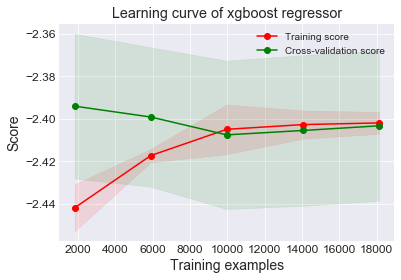

In [74]:
# plot the learning curve
plot_learning_curve(pipeline, 'Learning curve of xgboost regressor', X_train, y_train, cv = 5);

<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

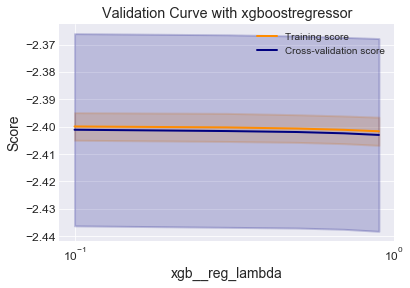

In [75]:
# plot the validation curve
vcplot(pipeline, X_train, y_train, 'xgb__reg_lambda', np.linspace(0.1, 0.9, 5), 'Validation Curve with xgboostregressor')

In [76]:
# create Dmatrix
bnb_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
# create the parameter dictionary: params
params = {'objective': 'reg:linear', 'max_depth': 2}
# train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain = bnb_dmatrix, num_boost_round=10)

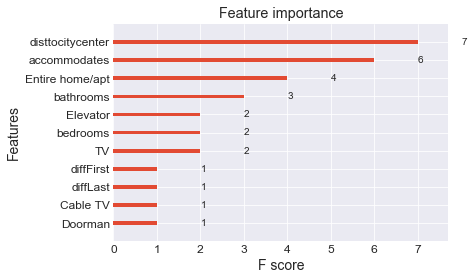

In [77]:
# plot the feature importance
xgb.plot_importance(xg_reg);

According to the plot above, it shows distanc to  city center is the most important predictor, accommodates is the second important predictor, third is whether the entire home/apartment is rent.

In [78]:
# applied xgb cross validation
result_xgbcv = xgb.cv(params=params, dtrain = bnb_dmatrix, num_boost_round=10, nfold = 5, early_stopping_rounds=5, metrics='rmse', as_pandas=True, seed = 8)

In [79]:
# calculate the cv rmse mean
rmse_xgb_cv = result_xgbcv['test-rmse-mean'].mean()

In [80]:
# fine tuning with XGB regressor
param = dict(xgb__colsample_bytree = np.linspace(0.1, 0.5),
            xgb__n_estimators = [50, 60],
            xgb__max_depth = np.arange(5, 10),
            )

In [82]:
# gridsearch
grid_mse = GridSearchCV(estimator=pipeline, param_grid=param, cv = 5, scoring = 'neg_mean_squared_error', verbose = 1, n_jobs = 5)

# fit x_train, y_train
grid_mse.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   52.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  4.3min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 10.7min


KeyboardInterrupt: 

In [ ]:
# gather the best parameters and lowest rmse from gridsearch
best_param = grid_mse.best_params_
lowrmse = np.sqrt(np.abs(grid_mse.best_score_))
print('Best Parameters found: ', best_param)
print('Lowest RMSE found:', lowrmse)

In [ ]:
# apply the best parameter to xbg model and train with training set
best_params = {'objective': 'reg:linear', 'n_estimators': 60, 'colsample_bytree': 0.775, 'max_depth': 8}
xgb_reg_best = xgb.train(params=best_params, dtrain = bnb_dmatrix, num_boost_round=10)

In [ ]:
# plot the important features
xgb.plot_importance(xgb_reg_best, max_num_features=10);

The distance to city center is the most important predictor, the time difference of the first review is the second. However, the description polarity score in neural and the one in compound are showed as important predictors.

## Keras Regressor

In [ ]:
# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
def base_model():
    # create model
    model = Sequential()
    # add hidden layer
    model.add(Dense(100, input_dim = X.shape[1], kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))
    # add compile to the model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    return model

lm = KerasRegressor(build_fn = base_model, nb_epoch = 100, batch_size = 100, verbose = 0)

In [ ]:
# remove the xgb from pipeline
pipeline.steps.pop(2)

In [ ]:
# insert new regressor to pipeline
pipeline.steps.append(('mlp', KerasRegressor(build_fn = base_model, nb_epoch = 100, batch_size = 100, verbose = 0)))

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
rmse_nn = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
rmse_nn

In [ ]:
# cross valiadation
results = cross_val_score(pipeline, X_train, y_train, cv = 5, n_jobs = 1, scoring='neg_mean_squared_error')

In [ ]:
print('RMSE:{0}'.format(np.sqrt(np.abs(results.mean()))))

In [ ]:
# make a deeper network
def deeper_model():
    # initial a model
    model = Sequential()
    model.add(Dense(100, input_dim = X.shape[1], kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(50, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    return model

In [ ]:
# remove previous model
pipeline.steps.pop(2)

In [ ]:
pipeline.steps.append(('mlp', KerasRegressor(build_fn = deeper_model, nb_epoch=100, batch_size = 100, verbose = 0)))

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred_kr = pipeline.predict(X_test)

In [ ]:
results_deep = cross_val_score(pipeline, X_train, y_train, cv = 5, n_jobs = 1, scoring = 'neg_mean_squared_error')

In [ ]:
rmse_deep = np.sqrt(np.abs(results_deep.mean()))
print('RMSE:{0}'.format(rmse_deep))

In [ ]:
plot_learning_curve(pipeline, 'Learning Curve of Keras Regressor', X_train, y_train, cv = 5);

With the traning samples grow up, the training score is approching to cross-validation score.

In [ ]:
vcplot(pipeline, X_train, y_train, 'mlp__nb_epoch', np.arange(100, 600, 100), 'Validation Curve of Keras Regressor')

The validation curve of keras regressor shows the training score was fit in cross-validation score.

### Random Forest with GridSearch

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [101]:
param = {'reg_rf__n_estimators': [20, 30, 50],
        'reg_rf__max_depth': [20, 30, 50]
        }

In [95]:
# instance of randomforest
reg_rf = RandomForestRegressor(random_state = 42)

In [96]:
pipeline.steps.pop(2)
pipeline.steps.append(('reg_rf', reg_rf))

In [106]:
gridsearch_reg_rf = GridSearchCV(pipeline, param_grid=param, cv = 5, n_jobs=5, scoring='neg_mean_squared_error')

In [107]:
gridsearch_reg_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg_rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
 ...estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'reg_rf__max_depth': [20, 30, 50], 'reg_rf__n_estimators': [20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [108]:
gridsearch_reg_rf.best_params_

{'reg_rf__max_depth': 30, 'reg_rf__n_estimators': 50}

In [109]:
gridsearch_reg_rf.best_score_

-0.16703883410629466

In [ ]:
# def function for calculate the mse and r2
def evaluation(prediction):
    # this function is to calculate both mse and r2
    # get the mse
    test = y_test
    rmse = np.sqrt(mean_squared_error(test, prediction))
    r2 = r2_score(test, prediction)
    return rmse, r2

## Evaluation

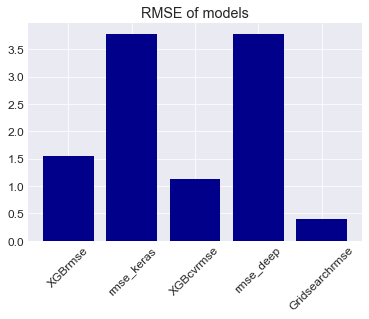

In [435]:
rmse_dict = {'rmse_deep': rmse_deep, 'rmse_keras': rmse_nn, 'Gridsearchrmse': lowrmse, 'XGBrmse': rmse_xgb, 'XGBcvrmse': rmse_xgb_cv}
plt.bar(x = range(len(rmse_dict)), height = list(rmse_dict.values()), color = 'darkblue')
plt.xticks(range(len(rmse_dict)), rmse_dict.keys(), rotation = 45)
plt.title('RMSE of models');

## Summary

*Text mining findings*
- Most of the airbnb in NYC are apartments rather than others.
- The names mention the location, number of rooms, and whether it
- The associated location information(i.e how many minutes you need to walk to anywhere else) of the airbnb house/apartment was mentioned in the description frequently.
- The frequent words that the name used are highly similar with the words in description.

*Modeling findings*
- All of the XGBoost models perform better than Keras regressors.
- With number of estimators: 60, colsample_bytree: 0.775, max_depth: 8 in xgboost tree regressor, it has around 0.4 rmse.
- The distance to city center is the most important predictor, the time difference of the first review is the second. However, the description polarity score in neural and the one in compound are showed as important predictors.


*Advantages*
- With the text mining(i.e applied setiment analysis and added the polarity scores), the prediction mean squared error droped down.